# Data

In [1]:
# Imports
import pandas as pd
# import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
URL = 'https://raw.githubusercontent.com/MohamadNach/Machine-Learning-to-Predict-Energy-Consumption/master/events.csv'
df = pd.read_csv(URL)

## Data Exploration

In [3]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [4]:
print("Return last 5 rows.","\n")
df.tail()

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [6]:
#print("Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.", "\n")
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



## Feature Extraction


In [7]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
dtypes: float64(1), object(1)
memory usage: 827.7+ KB


since we are dealing with time series data we should edite the index from 1 2 3 ... --> DateTime format.

In [9]:
pd.to_datetime(df["DateTime"]).dt.isocalendar()

,year,week,day
0,2015,53,5
1,2015,53,5
2,2015,53,5
3,2015,53,5
4,2015,53,5
...,...,...,...
52961,2021,52,5
52962,2021,52,5
52963,2021,52,5
52964,2021,52,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
dtypes: float64(1), object(1)
memory usage: 827.7+ KB


In [11]:
_dt = pd.to_datetime(df["DateTime"])

In [12]:
_dt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52966 entries, 0 to 52965
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
52966 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 413.9 KB


In [13]:
_dt.dt.time

,DateTime
0,01:00:00
1,02:00:00
2,03:00:00
3,04:00:00
4,05:00:00
...,...
52961,20:00:00
52962,21:00:00
52963,22:00:00
52964,23:00:00


In [14]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52966 entries, 2016-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52966 non-null  float64
 1   Month        52966 non-null  int32  
 2   Year         52966 non-null  int32  
 3   Date         52966 non-null  object 
 4   Time         52966 non-null  object 
 5   Week         52966 non-null  UInt32 
 6   Day          52966 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(3)
memory usage: 2.7+ MB


In [16]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...
2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
 2   Month        52966 non-null  int32  
 3   Year         52966 non-null  int32  
 4   Date         52966 non-null  object 
 5   Time         52966 non-null  object 
 6   Week         52966 non-null  UInt32 
 7   Day          52966 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(4)
memory usage: 2.7+ MB


In [18]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [19]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [20]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


In [21]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [22]:
df

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2,2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
3,2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
4,2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
52961,2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
52962,2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
52963,2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday
52964,2021-12-31 23:00:00,10599.0,12,2021,2021-12-31,23:00:00,52,Friday


## Data Visualizations

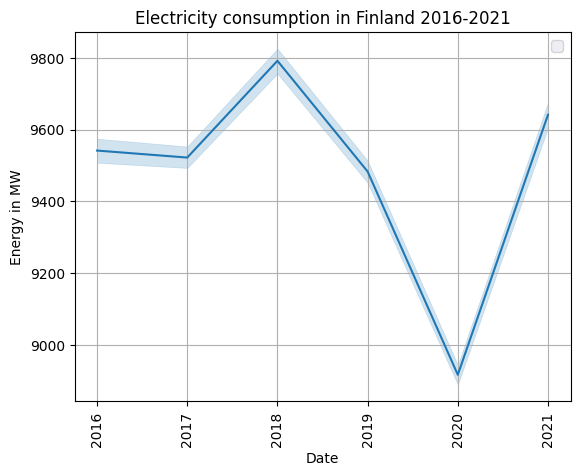

In [23]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


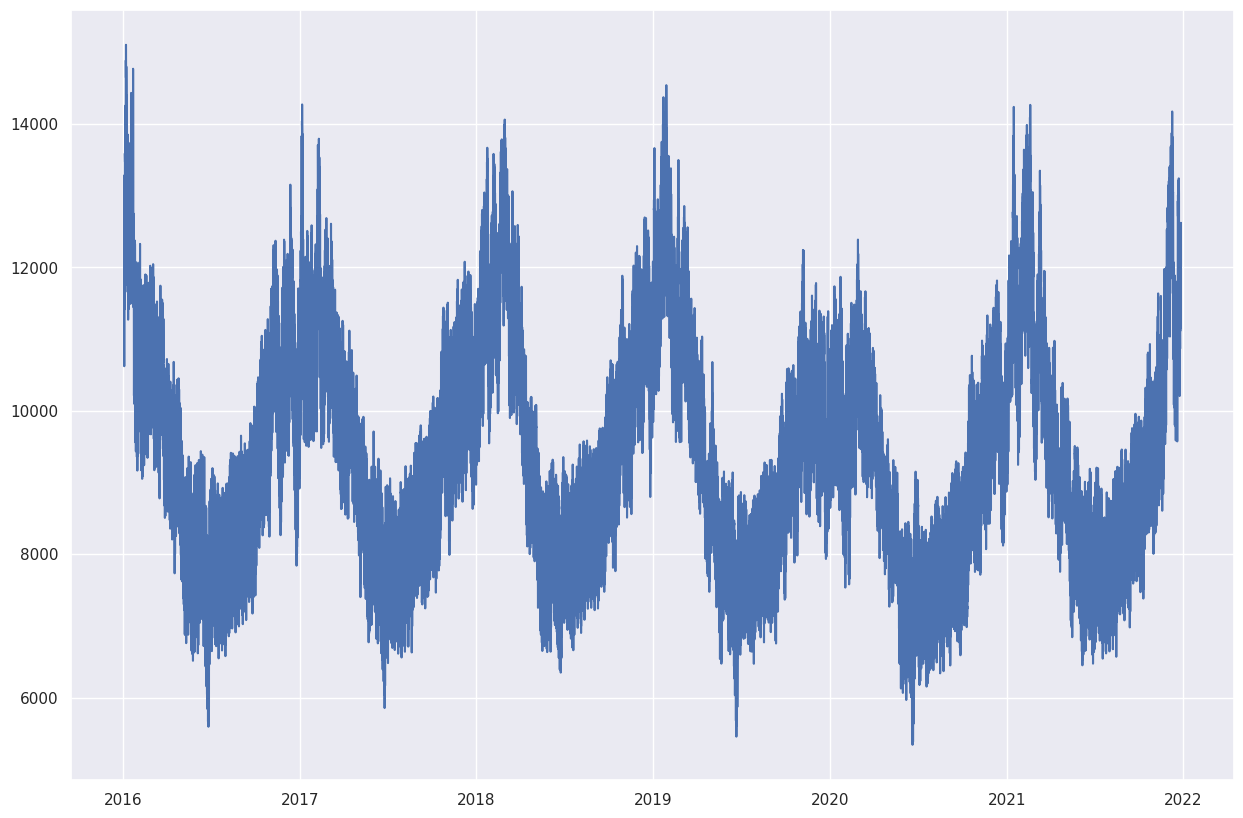

In [24]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

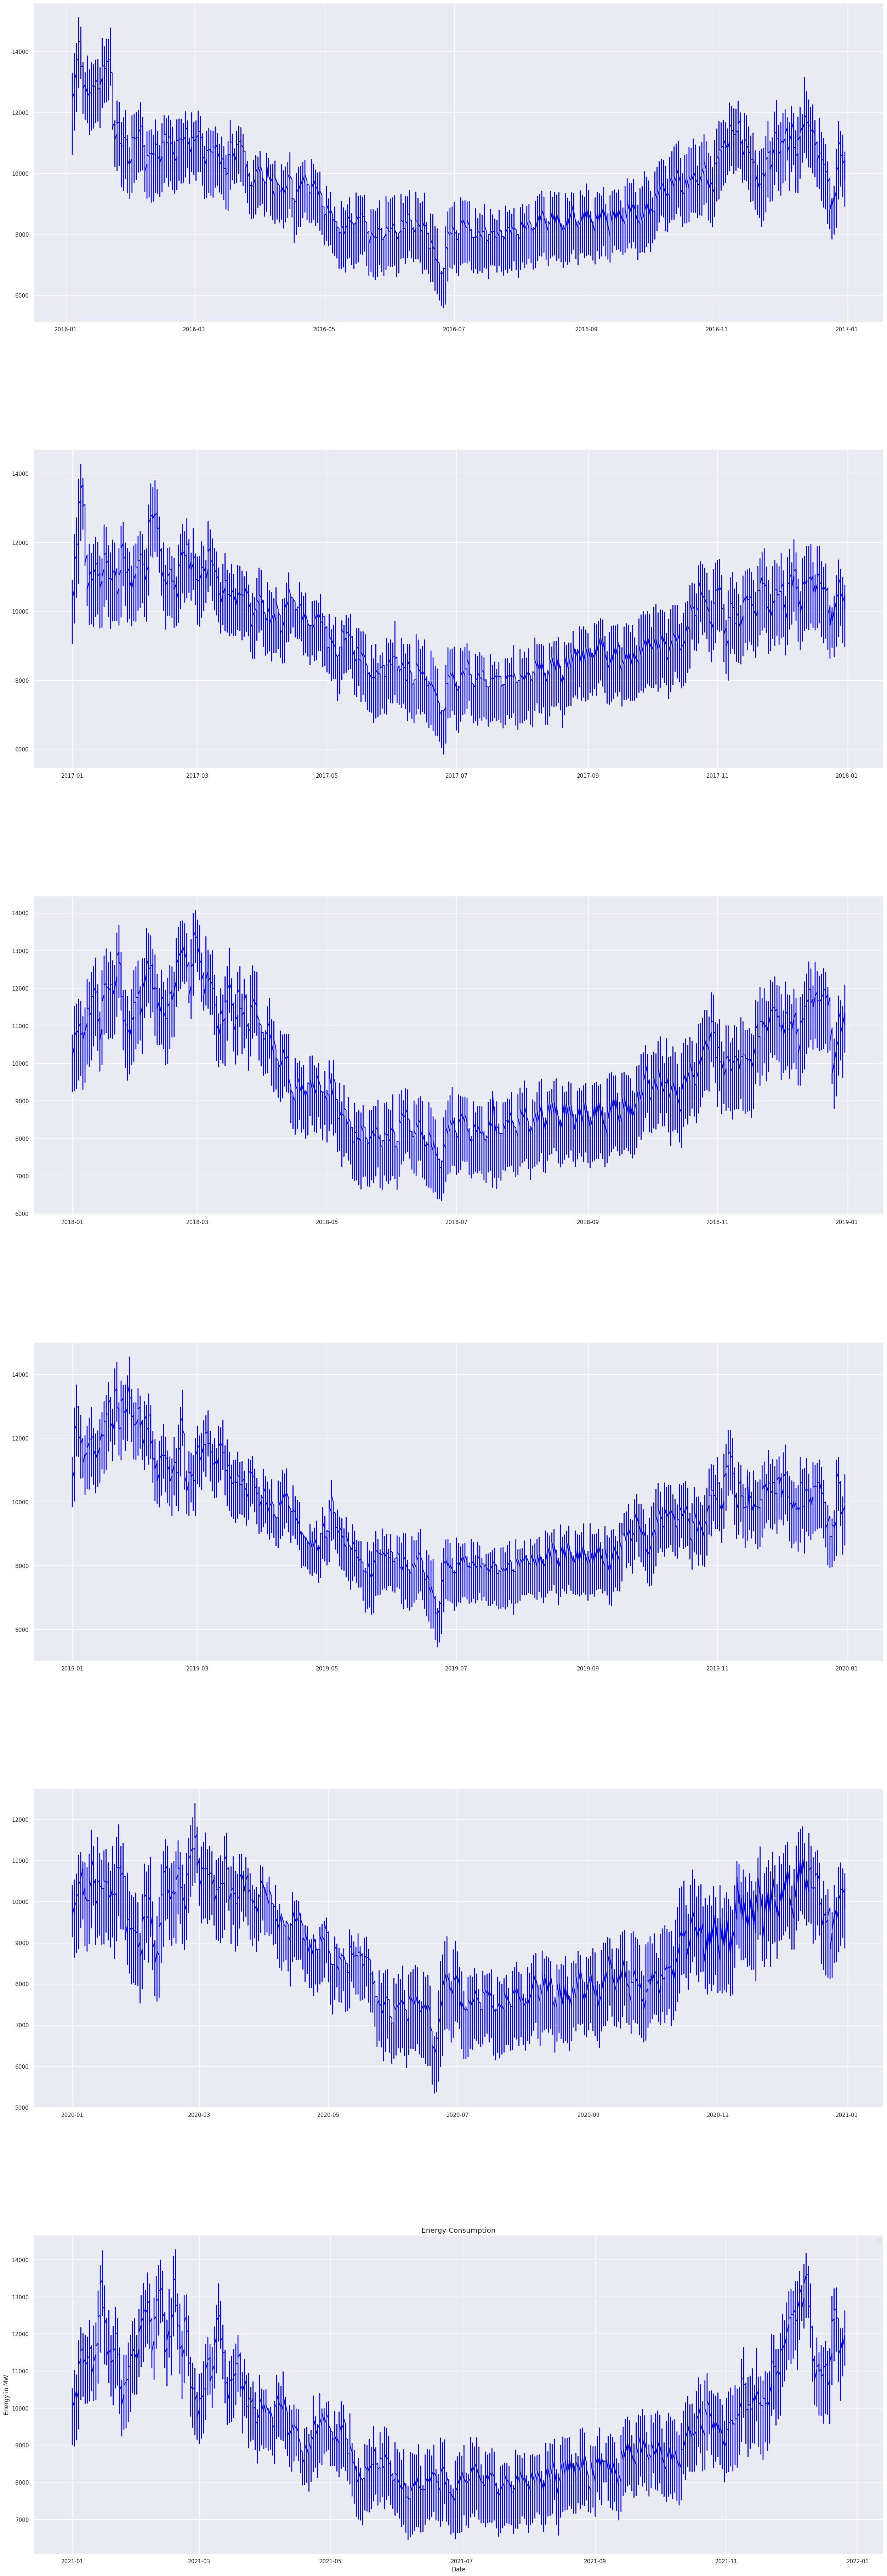

In [25]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-26-0801f72f3c60>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

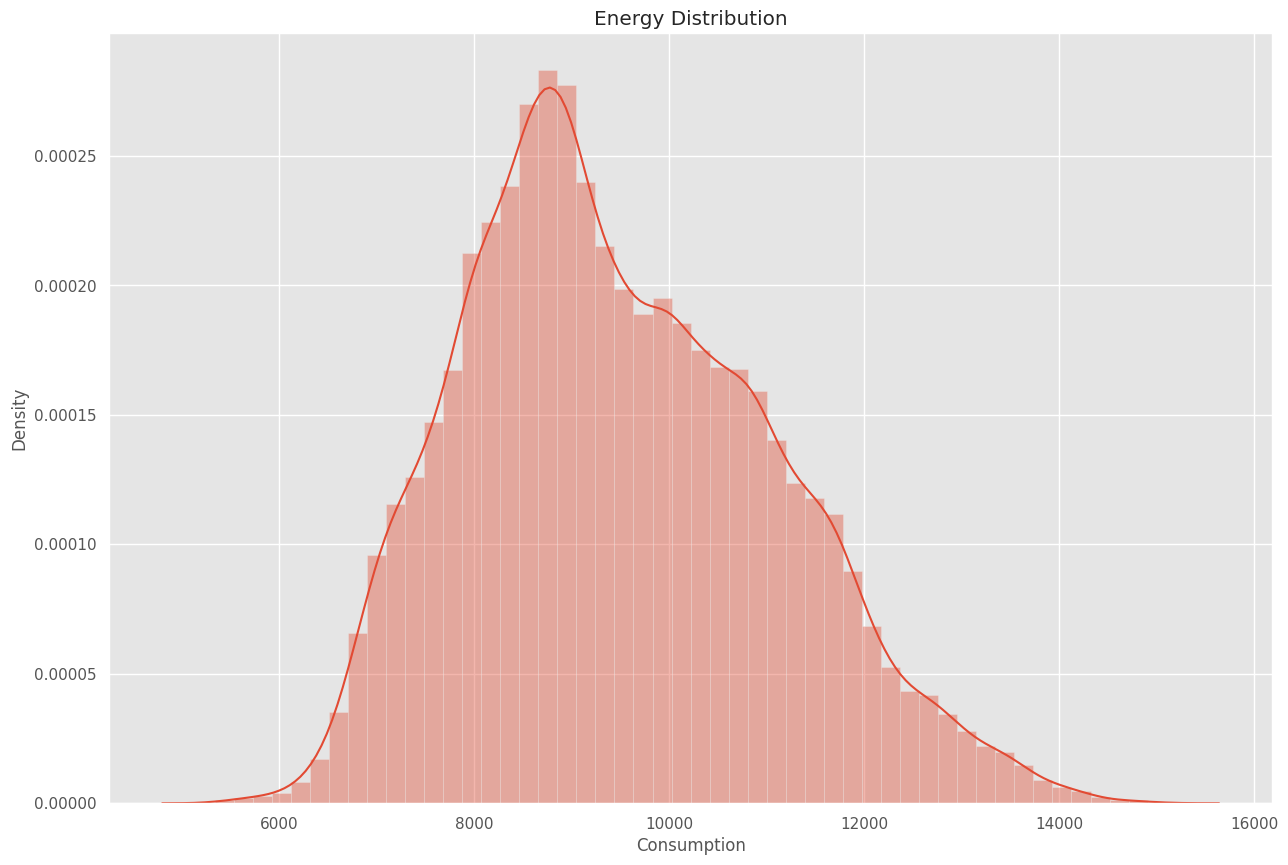

In [26]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

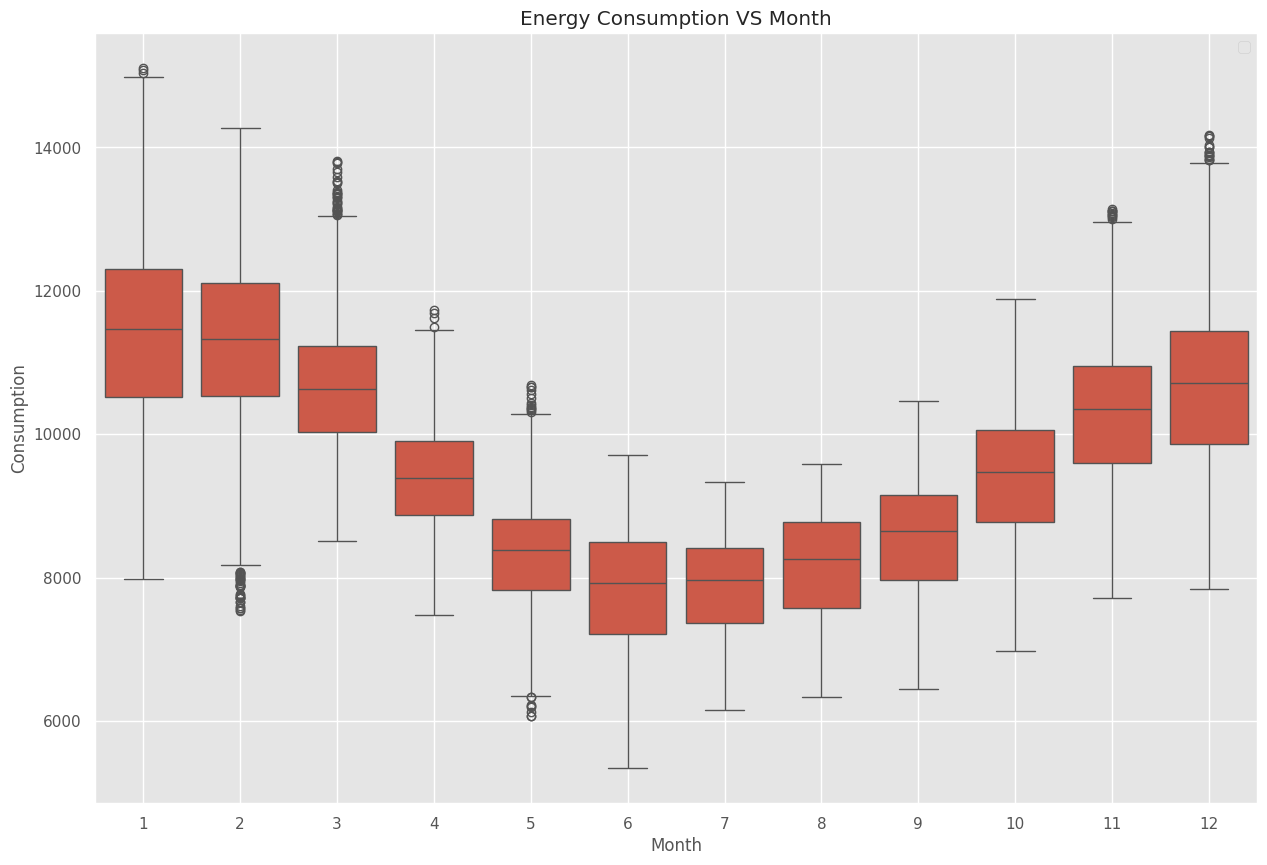

In [27]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [28]:
# dataset1.index.hour

In [29]:
# dataset1.Consumption

In [30]:
df

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2,2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
3,2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
4,2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
52961,2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
52962,2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
52963,2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday
52964,2021-12-31 23:00:00,10599.0,12,2021,2021-12-31,23:00:00,52,Friday


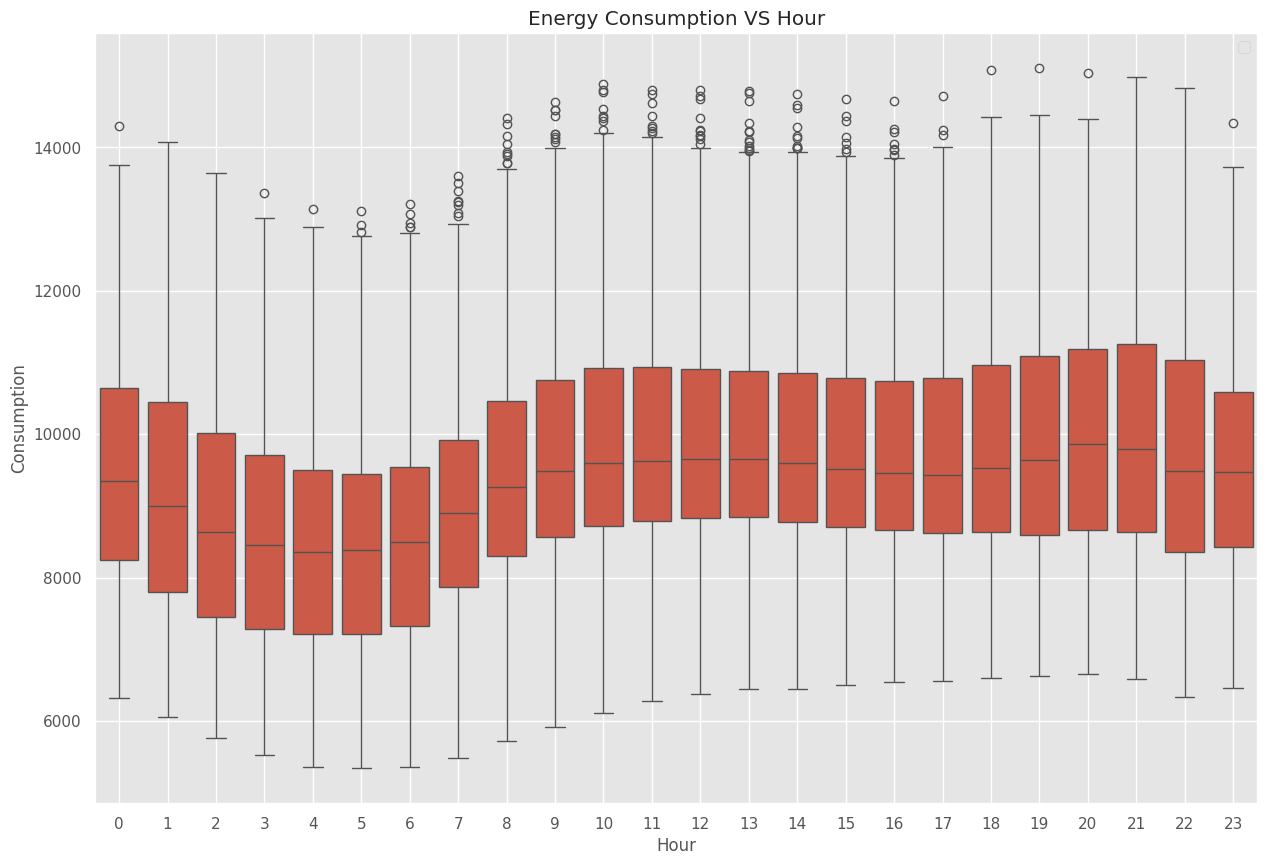

In [31]:
dataset1 = dataset
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.Consumption, data= dataset)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

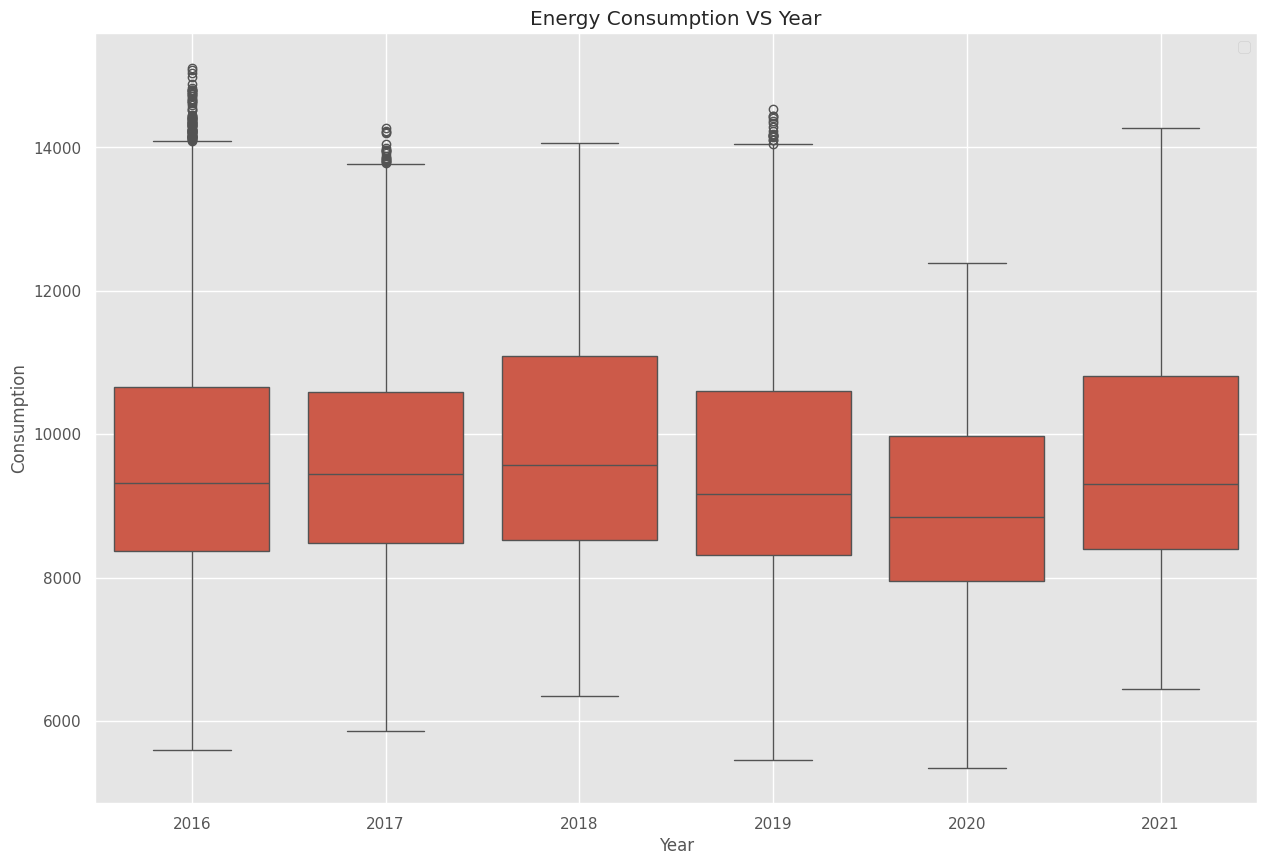

In [32]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.year, y=dataset1.Consumption, data= dataset)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# LSTM Model

## Train, Validation and Test Dataset

In [33]:
dataset2 = dataset[['Consumption','Month','Year', 'Week']]

In [34]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52774 non-null  float64
 1   Month        52774 non-null  int32  
 2   Year         52774 non-null  int32  
 3   Week         52774 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(2)
memory usage: 1.5 MB


In [35]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days
newDataSet = dataset2.resample("D").mean()
# newDataSet = dataset

In [36]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.
# 2184 / 7 = 312 week
# 312 * 80 %  250 week for train (1750 day)
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [37]:
# Saving data in CSV new file
# newDataSet.to_csv("newDataSet.csv")
# from google.colab import files
# files.download("newDataSet.csv")

In [38]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1.0,2016.0,1.0
2016-01-05,12945.375000,1.0,2016.0,1.0
2016-01-06,13192.750000,1.0,2016.0,1.0
2016-01-07,14243.541667,1.0,2016.0,1.0
2016-01-08,14121.666667,1.0,2016.0,1.0


In [39]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


<ipython-input-39-8e8eaf141bc3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [40]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [41]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [42]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)


In [43]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)


In [44]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


## Model Structure


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train

## Model Training

In [47]:
EPOCHS = 100
# EPOCHS = 2
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = EPOCHS ,batch_size = 20)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0454 - val_loss: 0.0046
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - val_loss: 0.0042
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0071 - val_loss: 0.0048
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0065 - val_loss: 0.0038
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0050 - val_loss: 0.0034
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/ste

In [48]:
# # How to save your model in Google Drive
# import torch
# from google.colab import drive
# drive.mount('/content/gdrive')

In [49]:
# model_save_name = 'LSTM-Model2022.h5'
# path = F"/content/gdrive/My Drive/{model_save_name}"
# torch.save(model, path)

## Model Evaluating

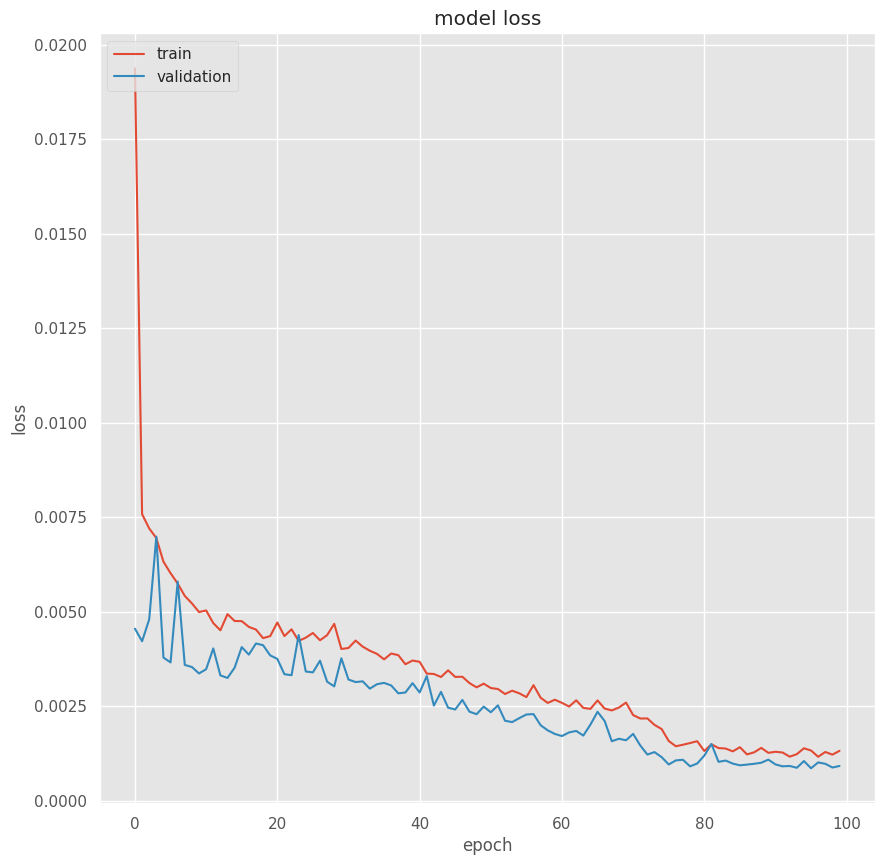

In [50]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [51]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [54]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9494.634061386398

In [55]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(1297, 1)
(336, 1)
(248, 1)
[9241.725]
(1297,)


# Conclusion

In [56]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Train Predictions,Actuals
0,[9241.724609375],[9406.708333333334]
1,[9374.662109375],[9614.791666666666]
2,[9407.009765625],[9894.708333333334]
3,[9309.5810546875],[8933.708333333334]
4,[8650.7509765625],[8557.208333333334]
...,...,...
1292,[9093.583984375],[9259.666666666666]
1293,[9738.49609375],[10248.5]
1294,[10305.12890625],[10360.333333333334]
1295,[10444.59375],[10489.833333333334]


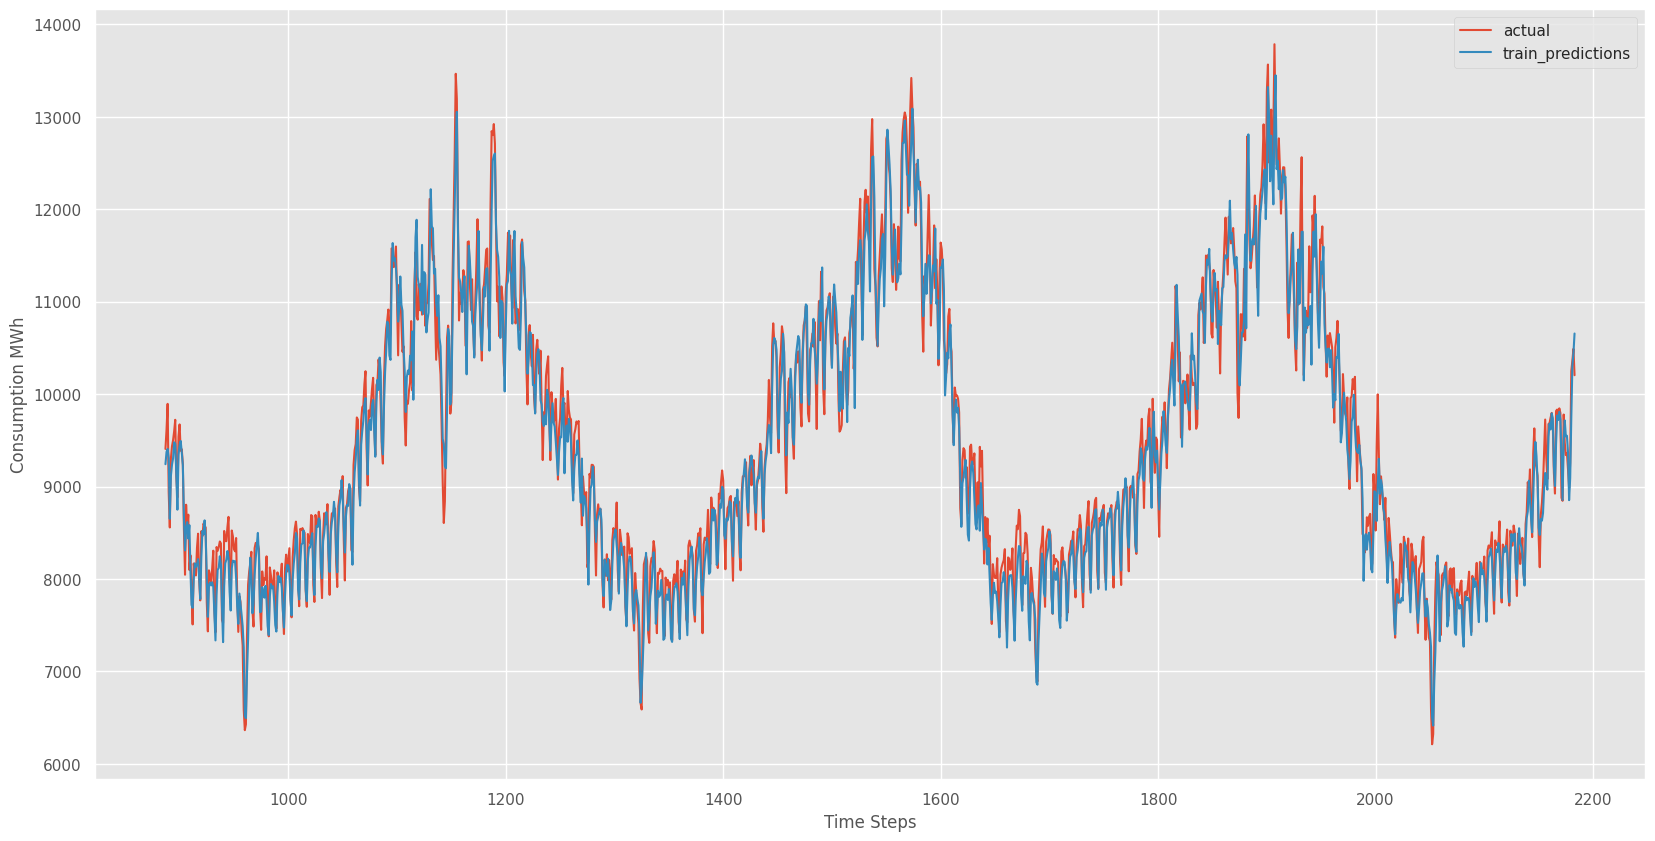

In [57]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [58]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Val Predictions,Actuals_val
0,[9349.9736328125],[8931.875]
1,[9226.615234375],[9112.916666666666]
2,[9273.0986328125],[10019.416666666666]
3,[10058.9296875],[10390.375]
4,[10450.5341796875],[10802.916666666666]
...,...,...
243,[8152.50244140625],[8020.541666666667]
244,[7846.68798828125],[7921.75]
245,[8437.138671875],[8705.041666666666]
246,[8692.2470703125],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

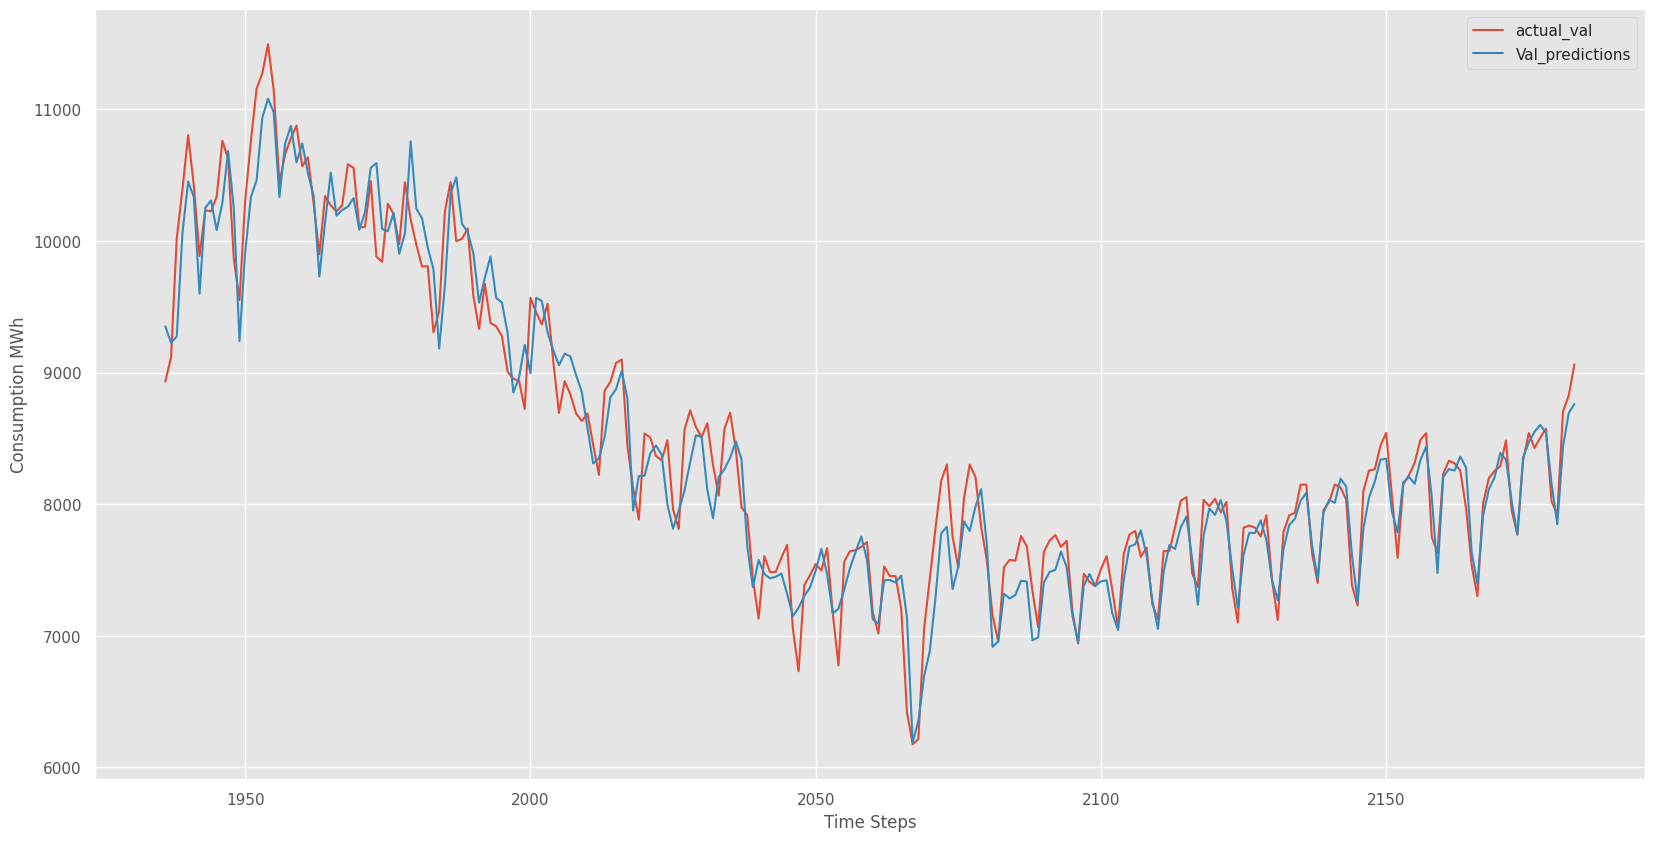

In [59]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


In [60]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,test Predictions,Actuals_test
0,[10653.0302734375],[10032.541666666666]
1,[10632.609375],[10732.125]
2,[10803.5556640625],[10733.583333333334]
3,[10682.400390625],[10971.875]
4,[11010.865234375],[11227.791666666666]
...,...,...
331,[12646.4560546875],[12540.25]
332,[12732.6572265625],[12635.958333333334]
333,[13050.3623046875],[11684.333333333334]
334,[11439.9619140625],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

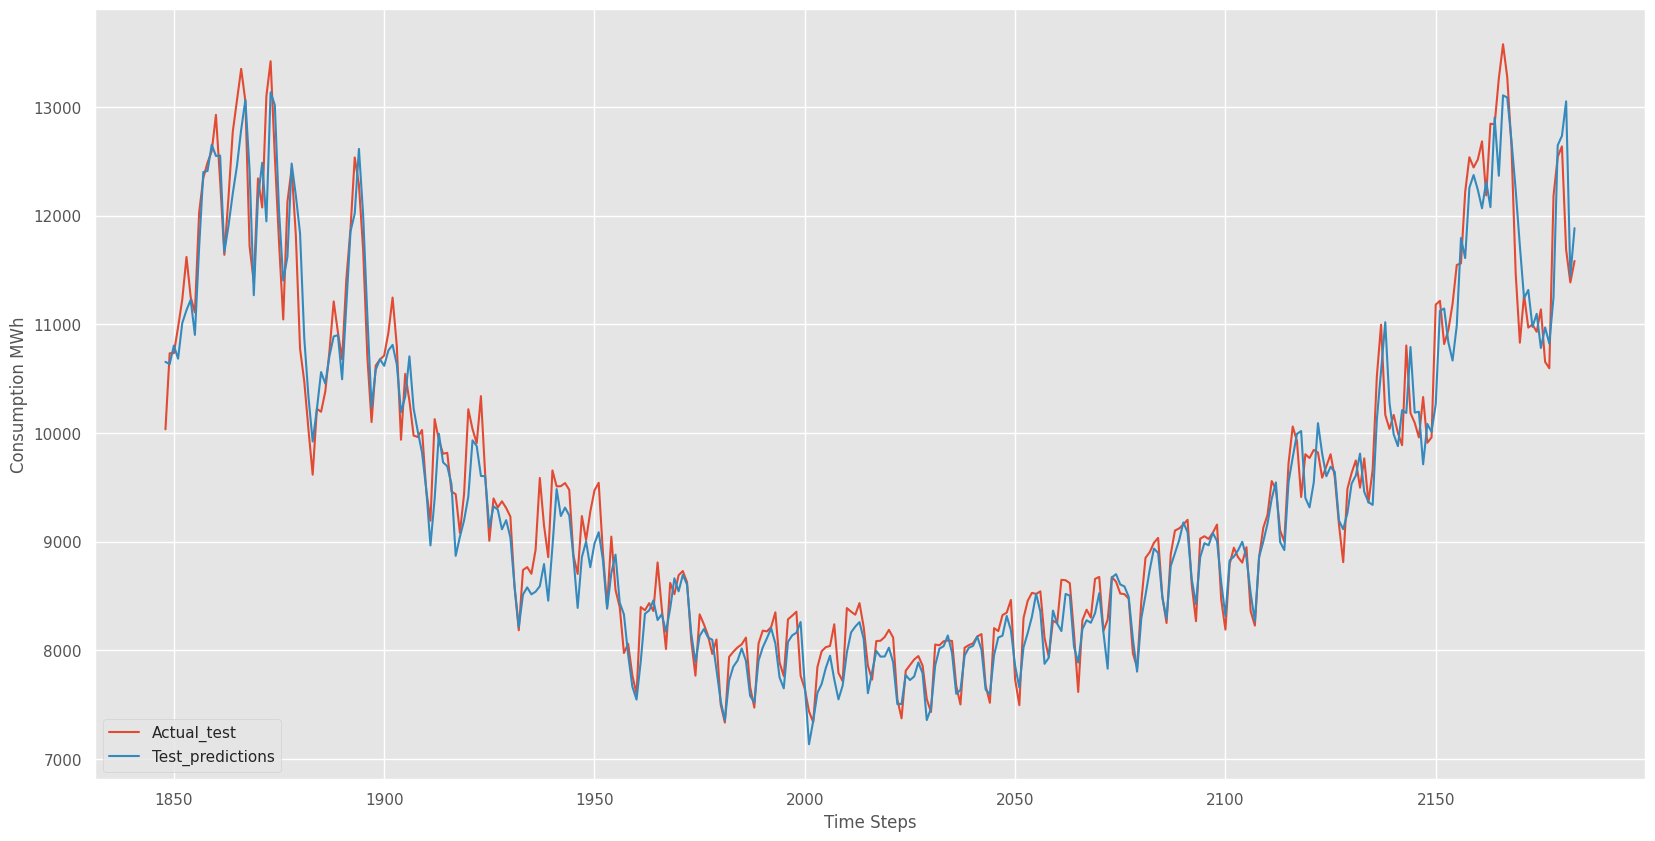

In [61]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

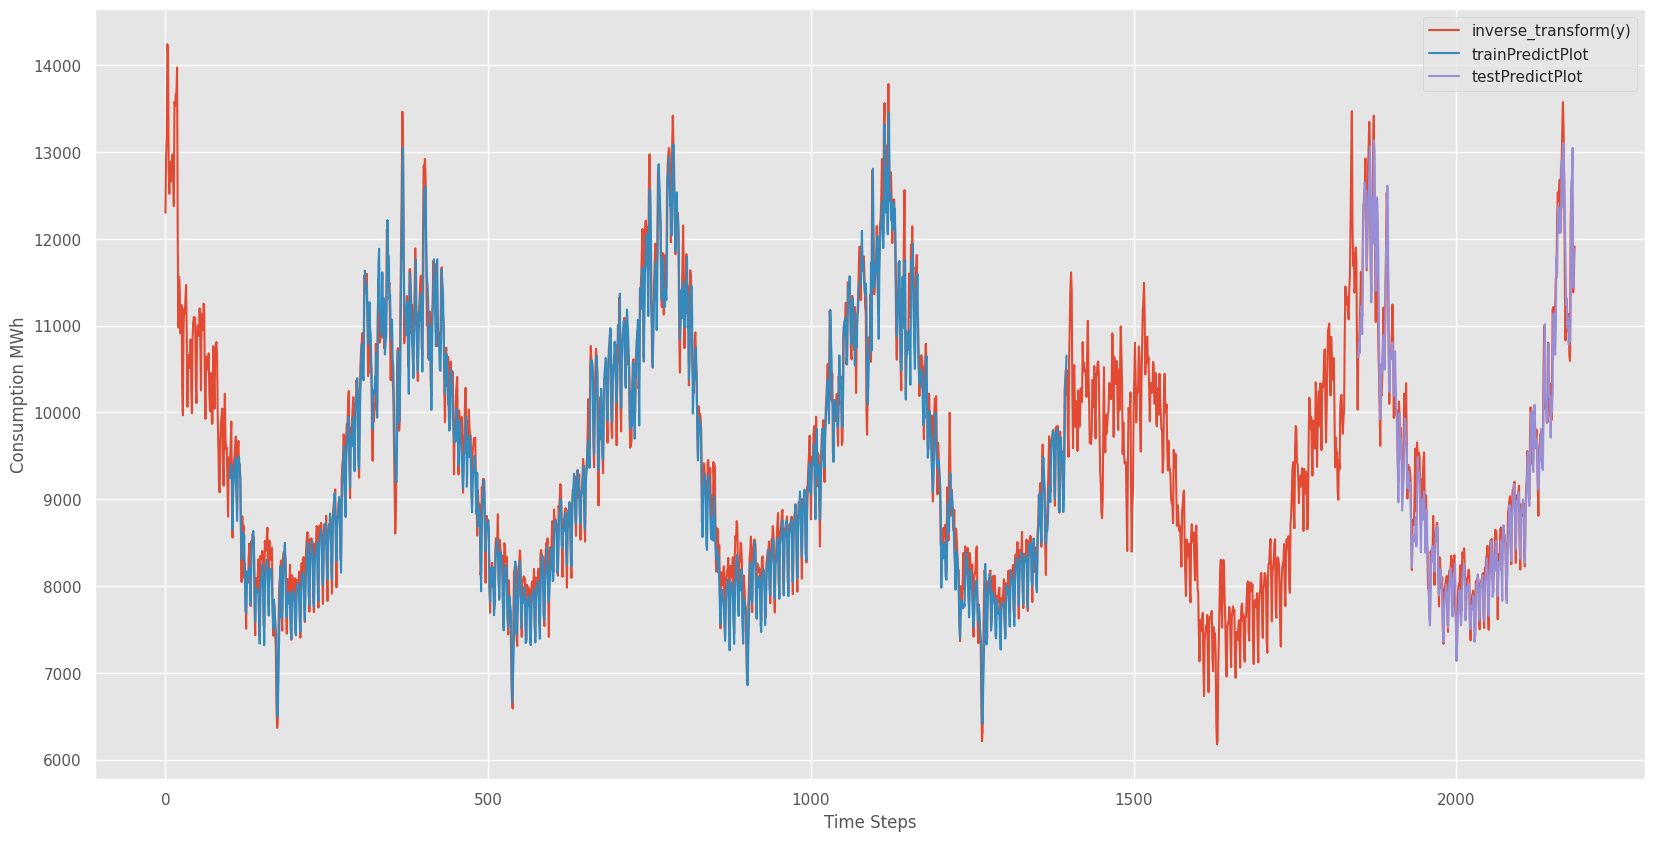

In [62]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# Future forecasting

In [63]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [64]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

2184
[[12359.6914267 ]
 [12498.62019161]
 [12515.64024801]
 [12420.10481293]
 [11970.73300834]
 [11457.26731146]
 [11570.6407466 ]
 [11823.07806845]
 [11900.69087202]
 [12046.49065221]
 [12189.73994846]
 [12029.72689445]
 [11698.11397249]
 [11981.12536485]
 [12469.53919287]
 [12637.52587522]
 [12701.30768905]
 [12661.89492221]
 [12253.60254685]
 [11656.05887736]
 [11717.25221927]
 [11977.85070504]
 [11944.91945649]
 [11922.7912193 ]
 [11897.86918278]
 [11568.8062639 ]
 [11071.0483552 ]
 [11278.28623528]
 [11624.72408558]
 [11685.12304599]]


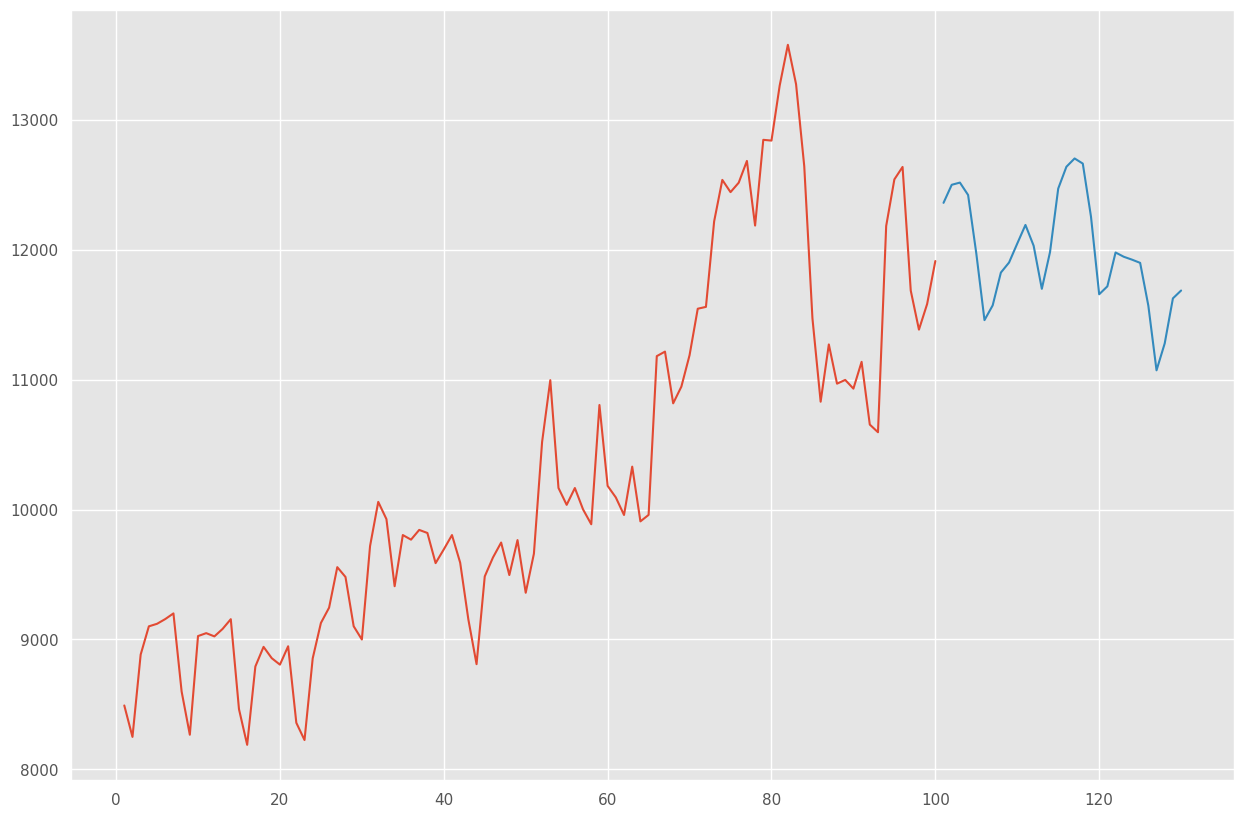

In [65]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

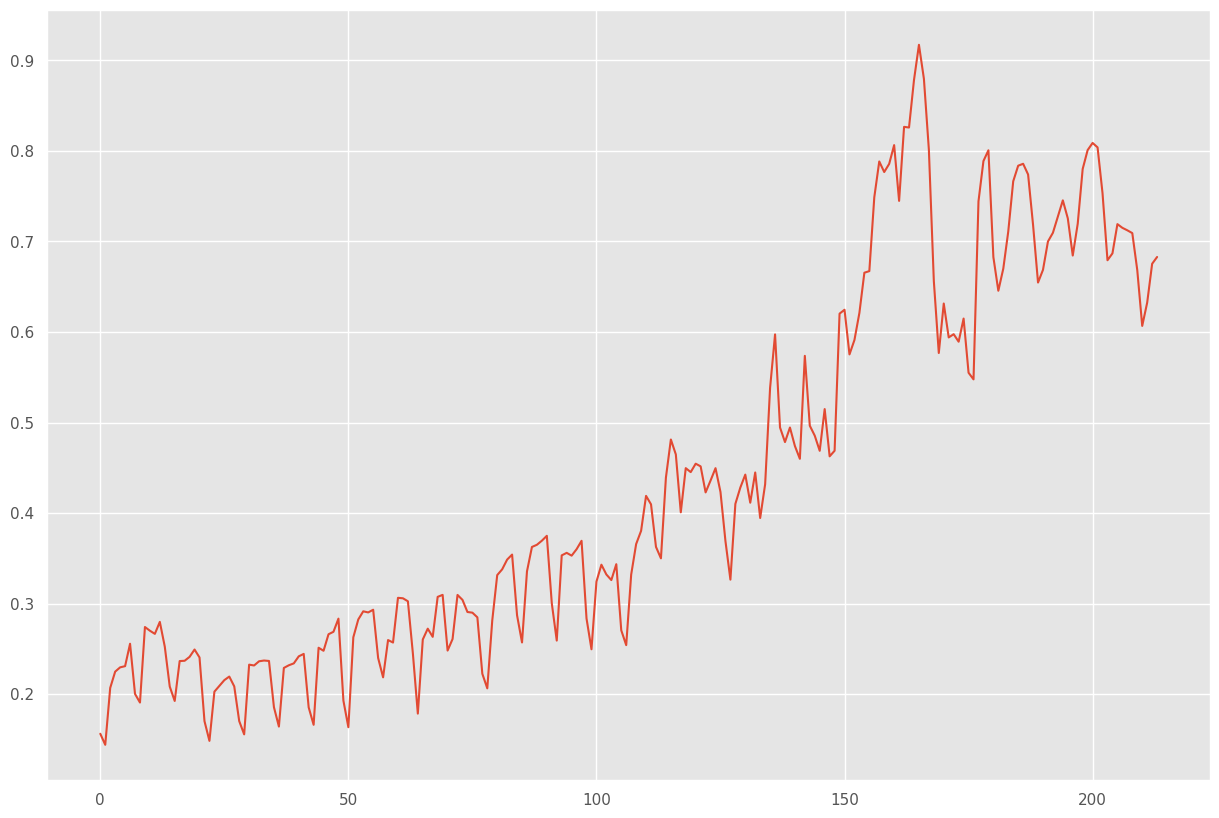

In [66]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

